<a href="https://colab.research.google.com/github/sahay-46/shruti_ranjan/blob/main/Copy_of_Shruti_Ranjan_2348545(CIA_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy.lib.shape_base import row_stack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.Data Loading and Inspection
data = pd.read_csv('/content/2015 (1).csv')
data.head()



,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
# 2. Missing Values
# Remove duplicate entries based on Country
data=data.drop_duplicates(subset='Country')
print(data)
print('No of rows and columns')

# Display the number of rows and columns
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Display the first few rows of the dataset to get a glimpse of the data
data.head()


In [ ]:
# Identify missing values and count them for each column
missing_values = data.isna().sum()

# Display columns with missing values and their counts
columns_with_missing_values = missing_values[missing_values > 0]
print('Columns with missing values:')
print(columns_with_missing_values)


Columns with missing values:
Series([], dtype: int64)


In [ ]:
# Define bin edges and labels
bin_edges = [0, 4, 6, 10]  # These values define the bin boundaries
bin_labels = ['Low Happiness', 'Medium Happiness', 'High Happiness']

# Create a new column 'Happiness Group' based on binning
data['Happiness Group'] = pd.cut(data['Happiness Score'], bins=bin_edges, labels=bin_labels)

# Display the first few rows to verify the new column
print(data[['Country', 'Happiness Score', 'Happiness Group']].head())


       Country  Happiness Score Happiness Group
0  Switzerland            7.587  High Happiness
1      Iceland            7.561  High Happiness
2      Denmark            7.527  High Happiness
3       Norway            7.522  High Happiness
4       Canada            7.427  High Happiness


In [ ]:
# 3. Strip Leading/Trailing white spaces and convert name to title case(first letter to capitalize)
data['Country']=data['Country'].str.strip().str.title()
data['Region']=data['Region'].str.strip().str.title()
print(data)

In [ ]:
# one hot encoding to convert categorical data into numercial data
Encoding = pd.get_dummies(data,columns=['Region'],prefix=['Region'])
print(Encoding)

In [ ]:
# Import the necessary libraries
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the 'Economy (GDP per Capita)' column
data['Economy (GDP per Capita)'] = scaler.fit_transform(data[['Economy (GDP per Capita)']])

# Print the first few rows of the DataFrame to show the result
print(data.head())


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                  0.826132  1.34951   
1         0.04884                  0.770412  1.40223   
2         0.03328                  0.784113  1.36058   
3         0.03880                  0.863099  1.33095   
4         0.03553                  0.784592  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [ ]:
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(data['Region'], data['Happiness Rank'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the chi-square statistic and p-value
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
if p < alpha:
    print("There is a significant association between 'Region' and 'Happiness Rank'.")
else:
    print("There is no significant association between 'Region' and 'Happiness Rank'.")


Chi-square statistic: 1415.3258620689655
P-value: 0.4107040079831256
There is no significant association between 'Region' and 'Happiness Rank'.


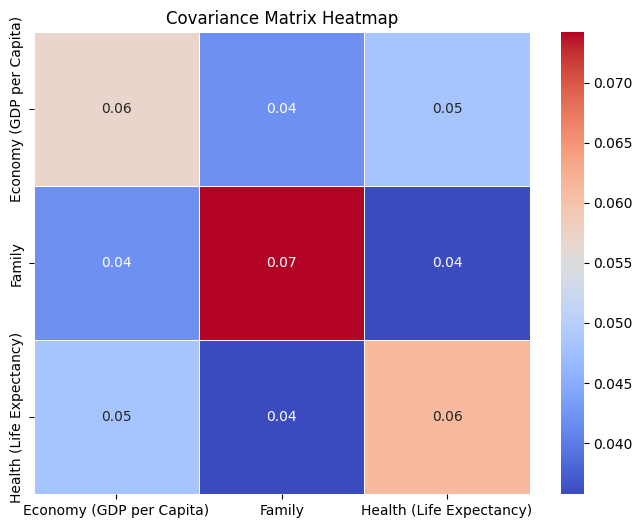

In [ ]:
# Covariance Matrix using heatmap
import seaborn as sns

# Specify the columns for which you want to calculate the covariance
columns_subset = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']

# Create a DataFrame containing only the selected columns
subset_data = data[columns_subset]

# Calculate the covariance matrix
covariance_matrix = subset_data.cov()

# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()


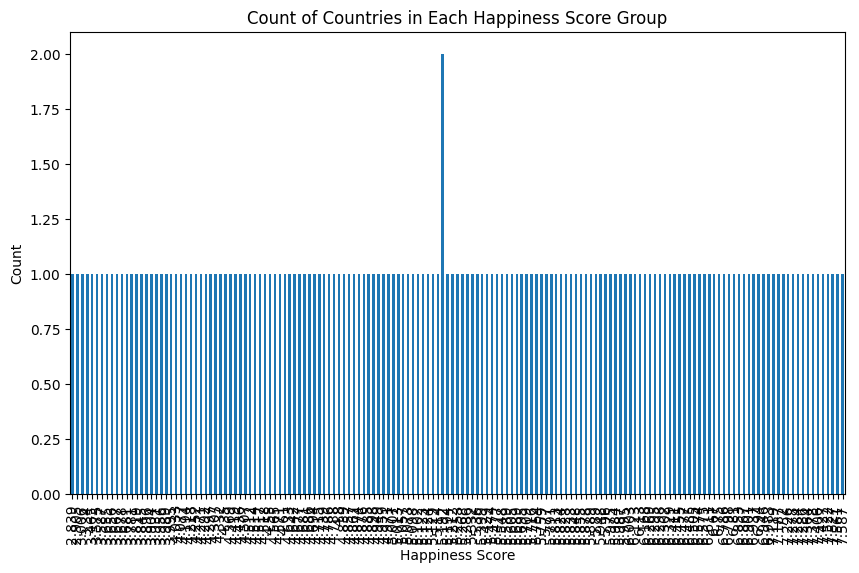

In [ ]:
# Your dataset
# Create a bar chart
plt.figure(figsize=(10, 6))
data['Happiness Score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.title('Count of Countries in Each Happiness Score Group')
plt.show()


<Figure size 1000x600 with 0 Axes>

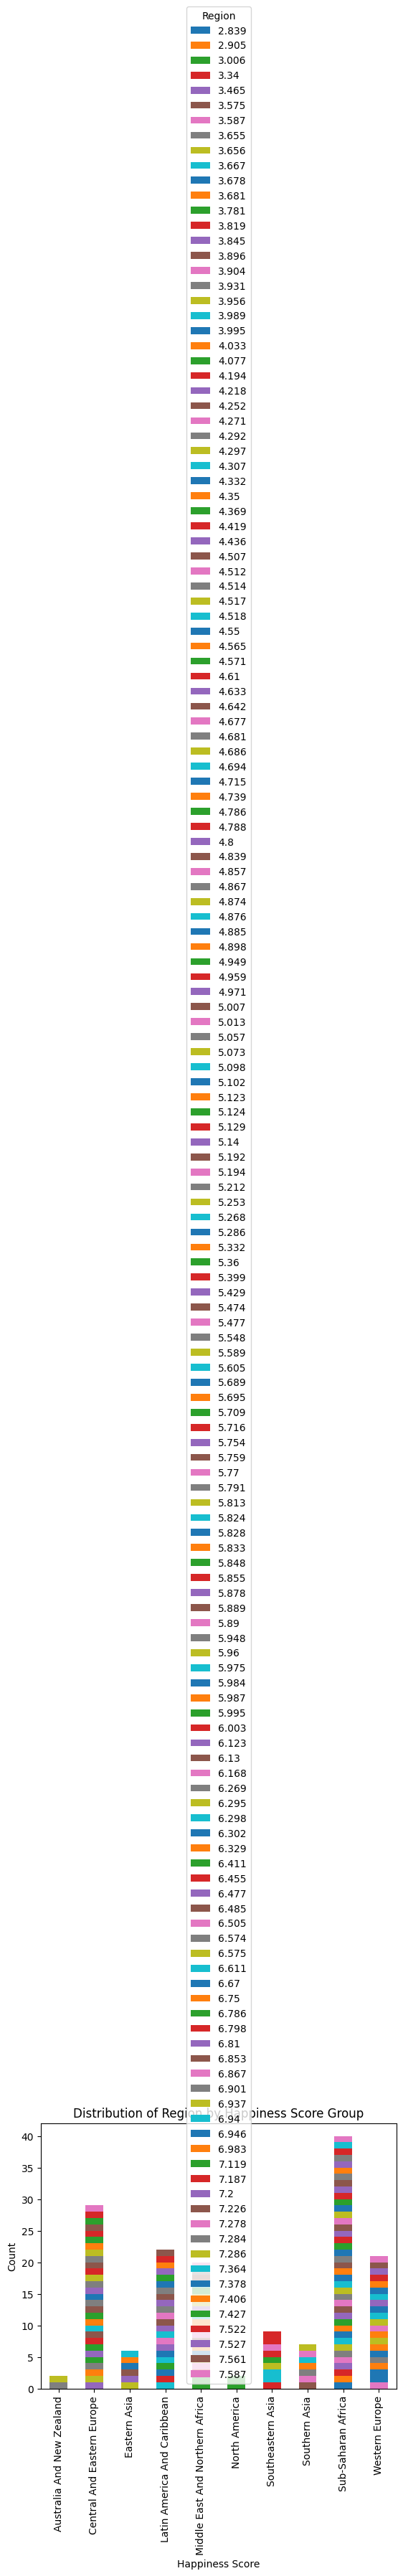

In [ ]:

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
region_happiness = data.groupby(['Region', 'Happiness Score']).size().unstack()
region_happiness.plot(kind='bar', stacked=True)
plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.title('Distribution of Region by Happiness Score Group')
plt.legend(title='Region')
plt.show()
